# IS450 - Text Mining and Language Processing

## Lab 7

### Objectives 

-   Use Gensim to apply LDA on a large corpus.
-   Study the outputs Topics
-   Visualizations

#### Additional Topics

-   LDA Evaluations 
-   How to find the best number of K?
-   How to find the most dominant topic in each document?
-   Save the model (model for future use and the dstirbutions for the analysis)
-   Exercise - Run the saved model on new data set and analyse results

### Latent Dirichlet Allocation with Gensim

The first part of this lab shows you how to use Gensim to perform Latent
Dirichlet Allocation (LDA). We need to load a large corpus for
performing LDA. You can download the data set `SGNews` from eLearn under the project page
(because this data set is one of the data sets we have provided for your group project). This
corpus contains over 7000 documents.

We will use a slightly different version
of preprocessing functions. You will see the file `preprocess2.py`
inside the directory that contains this Jupyter notebook. 
We will use the functions from `preprocess2` to load the corpus,
tokenize the text and remove stop words. 
Note the following differences in our preprocessing steps:
- We have added additional words to the stop word list.
- We do not perform stemming here. There are two reasons for this: (1) Later we would like to inspect the learned topics and check their meanings. So keeping the original words would make it easier for the inspection. (2) When we have a large corpus, it becomes less important to perform stemming.
- Note that for LDA analysis, the document vectors we use should not be weighted by IDF values.

The code below shows the steps of processing the corpus. Note that
`corpus2docs` will take a while to run because the corpus is large.



In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd

C:\Users\65924\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df1 = pd.read_csv("cnn_27feb.csv")
df2 = pd.read_csv("cnn_28feb.csv")
df3 = pd.read_csv("cnn_1mar.csv")
df4 = pd.read_csv("cnn_2mar.csv")
df5 = pd.read_csv("cnn_3mar.csv")
df6 = pd.read_csv("cnn_8mar.csv")
df7 = pd.read_csv("cnn_9mar.csv")

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df2 = df[['content']]

df2.head(5)

,content
0,CNN —\n\nAustralia won the Women’s T20 World C...
1,CNN —\n\nBetrayal has formed part of European ...
2,"CNN —\n\nIn February 1992, a sprightly 16-year..."
3,CNN —\n\nIt was an impressive and eventful thi...
4,CNN —\n\nYouTuber Jake Paul suffered the first...


In [3]:
i=0
for index, row in df2.iterrows():
    if i > len(df2):
       break
    else:
       f = open(str(i)+'.txt', 'w', encoding='utf-8')
       f.write(row[0])
       f.close()
       i+=1

In [4]:
import preprocess2
cnn_corpus = preprocess2.load_corpus('./cnntext')
cnn_docs = preprocess2.corpus2docs(cnn_corpus)

import gensim
sg_dictionary = gensim.corpora.Dictionary(cnn_docs)
sg_vecs = preprocess2.docs2vecs(cnn_docs, sg_dictionary)

Now we are ready to perform LDA on the document vectors `sg_vecs`.
The code below shows how to call the function. Note that this will
also take a while to finish.

In [5]:
#I used 10 topics. You can try other numbers as well
sg_lda = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=10)


The variable `sg_lda` now stores the 10 learned topics.

To inspect these learned topics, we can use a function called `show_topics`.
This function allows us to specifiy how many topics we want to inspect and for each topic how many top words we want to include.
Let us use `show_topics(10, 15)` to choose all 10 topics and for each topic we choose the top-15 most frequent words.
Then we can display the topics one by one. For each topic, we see a list of words together with their probabilities shown.

In [6]:
topics = sg_lda.show_topics(10, 5) #10 topics and top 5 most frequent words

for i in range(0, 10):
    print(topics[i])

(0, '0.011*"team" + 0.009*"cup" + 0.008*"palestinian" + 0.008*"football" + 0.007*"fifa"')
(1, '0.006*"boxing" + 0.005*"ioc" + 0.005*"team" + 0.005*"iba" + 0.004*"time"')
(2, '0.012*"team" + 0.010*"cup" + 0.010*"football" + 0.008*"palestinian" + 0.006*"fifa"')
(3, '0.006*"team" + 0.004*"iba" + 0.004*"final" + 0.004*"games" + 0.003*"time"')
(4, '0.008*"league" + 0.005*"team" + 0.005*"sport" + 0.004*"fans" + 0.004*"football"')
(5, '0.005*"says" + 0.005*"team" + 0.004*"time" + 0.004*"sport" + 0.004*"record"')
(6, '0.004*"football" + 0.004*"cup" + 0.004*"team" + 0.003*"players" + 0.003*"nfl"')
(7, '0.005*"team" + 0.004*"time" + 0.004*"paterson" + 0.004*"final" + 0.003*"kirk"')
(8, '0.008*"iba" + 0.006*"games" + 0.006*"boxing" + 0.005*"ioc" + 0.004*"team"')
(9, '0.006*"tennis" + 0.005*"djokovic" + 0.004*"final" + 0.004*"fans" + 0.004*"open"')


#### Analyse the output
- By looking at the most important words under each topic, do you find the topics meaningful? How would you summarize or label each topic?

- If you re-run the LDA code above, you'll get a different set of topics. This is because there is some randomness in the LDA algorithm. Try to re-run the code above to re-generate `sg_lda` and insepct the learned topics again.

- The code above sets the number of topics to 10. You can try different numbers of topics (e.g., 5, 10, etc.) and see what the results look like.


### Visualizations

pyLDAvis is a python libarary for interactive topic model visualization. It is a port of the fabulous R package by Carson Sievert and Kenny Shirley. They did the hard work of crafting an effective visualization. pyLDAvis makes it easy to use the visualiziation from Python and, in particular, Jupyter notebooks. 

https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=

If pip install fails, the try
1. !python -m pip install -U pyLDAvis
2. conda install -c conda-forge pyldavis

In [7]:
#Install the package
#!pip install pyldavis

In [8]:
#!pip install numpy --upgrade

In [9]:
#Set up the environment to display the graphical outputs
#import pyLDAvis.gensim
#pyLDAvis.enable_notebook()
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
# lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
# visual= gensimvis.prepare(sg_lda, sg_vecs, sg_dictionary)


In [10]:
# Generate the visuals
#visual= pyLDAvis.gensim.prepare(sg_lda, sg_vecs, sg_dictionary)
visual= gensimvis.prepare(sg_lda, sg_vecs, sg_dictionary)

C:\Users\65924\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### Store the output and analyse the results

In [11]:
#Save the output to the html file
pyLDAvis.save_html(visual, "topic_viz.html")

Analyse the results. Compare the topics with the previous LDA model.


### Perplexity and Coherence Score

Perplexity and topic coherence scoring provide a convenient measure to judge how good a given topic model

In [12]:
# Compute Perplexity
perplex= sg_lda.log_perplexity(sg_vecs, total_docs=None) #For LDAModel
  # a measure of how good the model is. lower the better.



In [13]:
print('\nPerplexity for LDAModel: ', perplex)



Perplexity for LDAModel:  -8.472678467753838


In [14]:
# Compute Coherence Score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=sg_lda, texts=cnn_docs, dictionary=sg_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score LDAModel: ', coherence_lda)


Coherence Score LDAModel:  0.3208358092100525


### How to choose the optimal number of the topics?

On approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.


In [15]:
# Perplexity lower better
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 14, 2):
    sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    #sg_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=sg_vecs, num_topics=no_topics, id2word=sg_dictionary)
    perplex= sg_lda_x.log_perplexity(sg_vecs, total_docs=None)
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    perplexity_values.append(perplex)
    print("#Topics: " + str(num_topics) + " Score: " + str(perplex))

print(datetime.datetime.now())

2023-03-22 23:42:01.566513
#Topics: 2 Score: -8.088980192550736
#Topics: 4 Score: -8.177920918841243
#Topics: 6 Score: -8.3280206816002
#Topics: 8 Score: -8.40335853558548
#Topics: 10 Score: -8.4988754423665
#Topics: 12 Score: -8.685667356508345
2023-03-22 23:42:05.413542


In [16]:
# Coherence higher better
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    #sg_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=sg_vecs, num_topics=no_topics, id2word=sg_dictionary)
    coherencemodel = CoherenceModel(model=sg_lda_x, texts=cnn_docs, dictionary=sg_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2023-03-22 23:42:05.425605
#Topics: 2 Score: 0.272953528730309
#Topics: 4 Score: 0.32110290476651293
#Topics: 6 Score: 0.27975402565017726
#Topics: 8 Score: 0.27019234809993986
2023-03-22 23:42:35.063054


### Graphical Representation of the Perplexity Score

Pyplot is a python library that provides functions to plot the graphs. In our case, we want to plot the graph with num of topics vs Coherence scores of the model. 


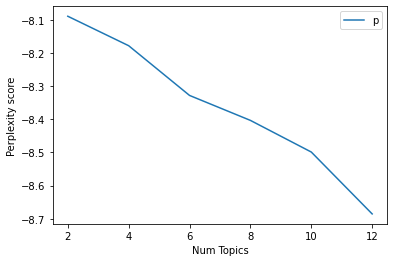

In [17]:
# Show graph for perplexity

import matplotlib.pyplot as plt

limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [18]:
# Print the perplexity scores
for m, cv in zip(x, perplexity_values):
    print("Num Topics =", m, " has Perplexity Value of", round(cv, 4))

Num Topics = 2  has Perplexity Value of -8.089
Num Topics = 4  has Perplexity Value of -8.1779
Num Topics = 6  has Perplexity Value of -8.328
Num Topics = 8  has Perplexity Value of -8.4034
Num Topics = 10  has Perplexity Value of -8.4989
Num Topics = 12  has Perplexity Value of -8.6857


### Graphical Representation of the Coherence Score

Pyplot is a python library that provides functions to plot the graphs. In our case, we want to plot the graph with num of topics vs Coherence scores of the model. 


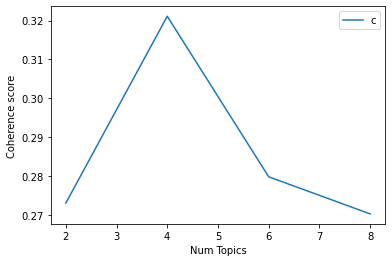

In [19]:
# Show graph for coherence

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.273
Num Topics = 4  has Coherence Value of 0.3211
Num Topics = 6  has Coherence Value of 0.2798
Num Topics = 8  has Coherence Value of 0.2702


###  Most Dominant Topic for each Document

One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document. We need to first decide on the optimal LDA model from the previous graph 

In [21]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[2] where the number of topics is 6

df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[2], corpus=sg_vecs, data=cnn_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from p

<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from p

<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-074015063fb4>:18: FutureWarning: The frame.append method is deprecated and will be removed from p

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.9950,"team, players, time, fans, palestinian, cup, i...","[australia, women, cup, brilliant, fashion, de..."
1,1,4,0.9736,"team, tennis, open, ioc, djokovic, league, tim...","[betrayal, formed, part, european, politics, p..."
2,2,3,0.9986,"team, players, time, fans, palestinian, cup, i...","[running, moors, hills, native, scotland, lesl..."
3,3,1,0.6258,"football, team, cup, players, palestinian, fif...","[years, old, mia, brookes, became, youngest, s..."
4,4,4,0.9964,"team, tennis, open, ioc, djokovic, league, tim...","[tennis, number, novak, djokovic, hopeful, pos..."
5,5,3,0.9986,"team, players, time, fans, palestinian, cup, i...","[running, moors, hills, native, scotland, lesl..."
6,6,4,0.9978,"team, tennis, open, ioc, djokovic, league, tim...","[rugby, career, campbell, johnstone, built, re..."
7,7,1,0.9965,"football, team, cup, players, palestinian, fif...","[lionel, messi, alexia, putellas, crowned, bes..."
8,8,4,0.5467,"team, tennis, open, ioc, djokovic, league, tim...","[umpires, spring, training, preseason, game, b..."
9,9,1,0.5678,"football, team, cup, players, palestinian, fif...","[embattled, french, football, federation, fff,..."


### Save the Model

Saving model for future use will save the time on the iterations. It is often needed to save to model to reuse in the future. 

In [22]:
#Save a model to disk, or reload a pre-trained model
sg_lda_sav=model_list[2] #Or you can save the best model, model_list[1]

sg_lda_sav.save("model_6Topics")

lda_disk=gensim.models.ldamodel.LdaModel.load("model_6Topics")

### Save the LDA distributions theta and beta

Saving the outputs to a csv file enables us to quickly analyse the data - mainly the topics in a friendly UI. We do not want to train the model every time as it may be expensive. 

In [23]:
#Code to save the document topic probabilities (theta)
import pandas as pd

vec=sg_lda_sav[sg_vecs]
pd.DataFrame(vec).to_csv("doc_topic_mixture.csv")

In [24]:
# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
for t in range(sg_lda_sav.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in sg_lda_sav.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
